In [90]:
import json
from urllib.request import urlopen
from PIL import Image, ImageDraw
import pandas as pd
import sqlite3
import numpy as np
import glob
import os

In [91]:
PIXELS_X = 910
PIXELS_Y = 910  # equal to the number of scan lines

In [92]:
prediction_json_file = '/Users/darylwilding-mcbride/Downloads/predictions-frame-2174-tile-33-size-1120.json'
with open(prediction_json_file) as file:
    prediction_json = json.load(file)

In [93]:
tile_file_name = os.path.basename(prediction_json[0]['filename'])
tile_file_name

'frame-2174-tile-33.png'

In [94]:
frame_id = int(tile_file_name.split('.')[0].split('-')[1])
tile_id = int(tile_file_name.split('.')[0].split('-')[3])

In [95]:
frame_id, tile_id

(2174, 33)

In [96]:
tile_server_url = 'http://spectra-server-lb-1653892276.ap-southeast-2.elb.amazonaws.com/tile/{}/frame/{}'.format(tile_id, frame_id)

In [97]:
img = Image.open(urlopen(tile_server_url))

In [98]:
draw_predictions = ImageDraw.Draw(img)

In [99]:
predictions = prediction_json[0]['objects']

In [100]:
for prediction in predictions:
    charge_state_label = prediction['name']
    coordinates = prediction['relative_coordinates']
    x = (coordinates['center_x'] - (coordinates['width'] / 2)) * PIXELS_X
    y = (coordinates['center_y'] - (coordinates['height'] / 2)) * PIXELS_Y
    width = coordinates['width'] * PIXELS_X
    height = coordinates['height'] * PIXELS_Y
    draw_predictions.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')

In [101]:
annotations_file_name = '/Users/darylwilding-mcbride/Downloads/via_export_json_aw.json'
with open(annotations_file_name) as annotations_file:
    annotations = json.load(annotations_file)

In [102]:
tile_server_url+'-1'

'http://spectra-server-lb-1653892276.ap-southeast-2.elb.amazonaws.com/tile/33/frame/2174-1'

In [103]:
regions = annotations[tile_server_url+'-1']['regions']

In [104]:
draw_ground_truth = ImageDraw.Draw(img)

In [105]:
for region in regions:
    shape = region['shape_attributes']
    x = shape['x']
    y = shape['y']
    width = shape['width']
    height = shape['height']
    # draw ground truth labels over the predictions
    draw_ground_truth.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='orange')

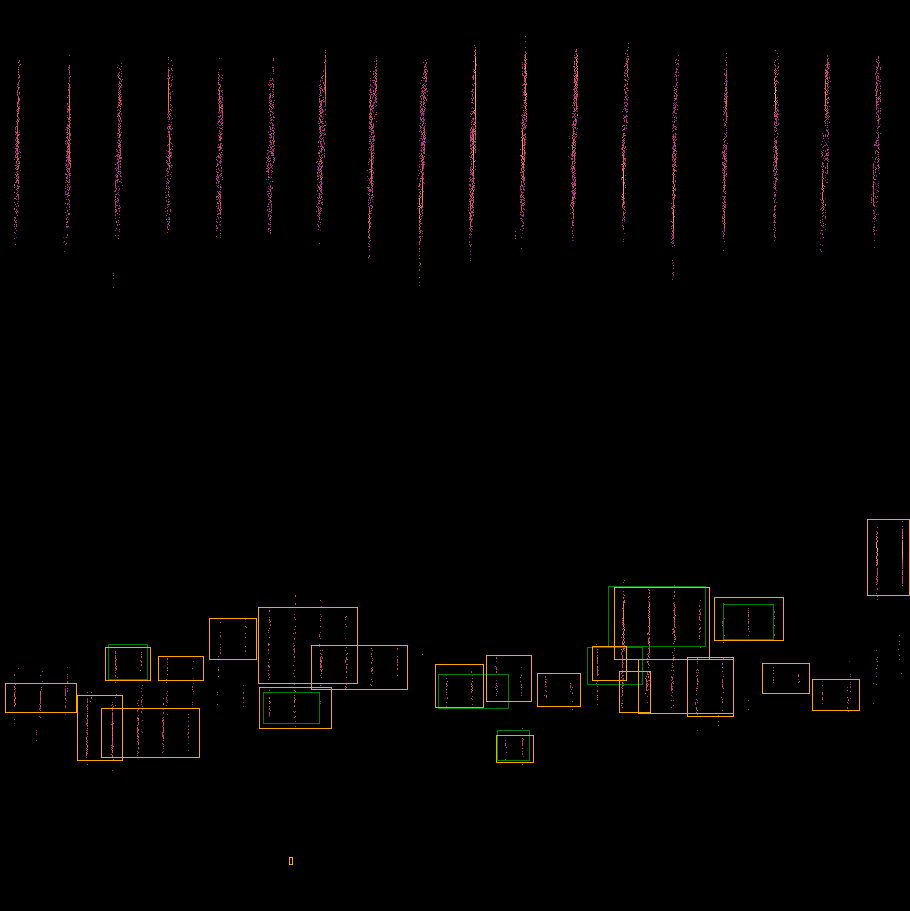

In [106]:
img